# Week 1


# Dataset 1 - Heart Attack Analysis And Prediction



This Heart attack dataset is a survey among 1025 induviduals from ages ranging between 29 and 77 years. The main objective of this study is to see how susceptible an induvidual is to have an heart attack. Our Dataset has 13 attributes and 1 target class which is the likeliness of an induvidual getting an heart attack. The given data set is a completely numeric data set.
Using this information , a machine learning model can be developed to find the probabilty of any individual suffering from an heart attack.

Link: https://heriotwatt.sharepoint.com/:x:/r/sites/DL/Shared%20Documents/DM%26%20ML/Heart%20Attack%20Analysis%20%26%20Prediction/heart.csv?d=w6d103271cf0e493e8aed526d710c709c&csf=1&web=1&e=O7ekFT


#  Dataset 2 - Netflix Movies and TV Shows

Netflix is a production company based in United States of America in Los Gatos, California. It is a well known American paid subscription streaming service. Reed Hashtings ans Marc Ranolph founded the company on August 29, 1997. It offers a coolection of films and televisions through famous distribution deal and they have their own productions known as Netflix Originals

With the growing popularity of smart phones and Smart TVs, Netflix like any of the other streaming/broadcasting services can be easily accessed from tablets, laptops and any other smart device. All shows and movies can be viewed in 4K resolution as well. Initially netfix distributed Blu-Ray rentals and DVDs as well.

The indicated tabular dataset contains lists for all TV episodes, movies linked with Netflix along with the details about the performers and directors, as well as ratings and other aspects.

It consists of the following attributes:

 - show id - each Film / Television how has its own ID
 - type - Television Show / Film
 - title - name of the Film / Television Show 
 - director - Film / Television Show director
 - cast - peformers in the movie or television show
 - country - the province in which the film or television show is set
 - date_added - the date the title was added to Netflix
 - release_year - actual release year for the Movie / Television Show
 - rating - film / television show rating
 - duration - number of seasons or timespan in minutes
 - listed_in - the genre 
 - description - description of the Movie / TV Show
 
 This is a nominal dataset. There are 8088 rows (records) and 12 columns
 
 Link : https://heriotwatt.sharepoint.com/:x:/s/DL/EYFuXjqsXLtAnmeJy8UYzCoB9jKD-Xn1qh0GZph6-aT7CA?e=01W6S9, 

# Dataset 3 - Vehicle Detection Image Set


This dataset contains images of vehicles taken from different angle i.e., taken from a car camera, surveillance camera,etc. There are two labels for the image set:

 - Vehicles ( 8968 )
 - Non-Vehicles ( 8792 )
 
This dataset has no vehicle type provided and consist of images taken under different lighting conditions and different time of the day. 
 
 Link : https://heriotwatt.sharepoint.com/:f:/s/DL/EqShixf5XbZHlsJ2GeV3C6MBuq_ZLI5Uvs4lhpHh3m6xow?e=y4BjWD

# Week 2

# Importing Libraries


In [1]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import seaborn as sns
#import pandoc

In [2]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required|


In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score ,roc_curve, roc_auc_score 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Get the Data

In [5]:
#DOWNLOAD_ROOT = "https://github.com/SAL6910/DL/blob/main/heart.csv"
heart= pd.read_csv("https://raw.githubusercontent.com/SAL6910/DL/main/heart.csv")
heart.head()
# To get the first 5 lines of the dataset 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
heart["age"].value_counts()
# Number of times the first and last five values in column 'age' has been repeated

58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: age, dtype: int64

In [8]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
heart_null = heart[heart.isnull().any(axis=1)].head()
heart_null
# display rows with missing values
# axis=1 (represents columns) , axis=0 (represents rows)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [10]:
# The data does not contain any null values, hence it requires no further cleaning 

# Edited Dataset with Null Values


In [11]:
# heart 2

In [12]:
heart2= pd.read_csv("https://raw.githubusercontent.com/SAL6910/DL/main/heart2.csv")
heart2.head(12)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.0,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.0,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,NaN,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62.0,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58.0,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58.0,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55.0,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46.0,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54.0,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [13]:
heart2_null = heart2[heart2.isnull().any(axis=1)]
heart2_null
# display rows with missing values
# axis=1 (represents columns) , axis=0 (represents rows)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
3,NaN,1,0,148,203,0,1,161,0,0.0,2,1,3,0
20,NaN,1,2,140,185,0,0,155,0,3.0,1,0,2,0
42,NaN,0,0,130,330,0,0,169,0,0.0,2,0,2,0
55,NaN,1,0,140,217,0,1,111,1,5.6,0,0,3,0
69,NaN,0,0,160,164,0,0,145,0,6.2,0,3,3,0
76,NaN,1,2,124,255,1,1,175,0,0.0,2,2,2,1
89,NaN,1,0,144,193,1,1,141,0,3.4,1,2,3,0
103,NaN,1,2,138,257,0,0,156,0,0.0,2,0,2,1
124,NaN,1,0,120,260,0,1,140,1,3.6,1,1,3,0
155,NaN,1,1,108,309,0,1,156,0,0.0,2,0,3,1


In [14]:
heart2.iloc[5:12,0:33]
# iloc commands is used to print a specific range of data 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58.0,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58.0,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55.0,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46.0,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54.0,1,0,122,286,0,0,116,1,3.2,1,2,2,0
10,71.0,0,0,112,149,0,1,125,0,1.6,1,0,2,1
11,43.0,0,0,132,341,1,0,136,1,3.0,1,0,3,0


In [15]:
heart2_null.dropna()
# Helps to remove all values with NUll

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [16]:
heart2.dropna()
# shows the original dataset without null values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.0,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.0,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,62.0,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58.0,0,0,100,248,0,0,122,0,1.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,47.0,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59.0,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60.0,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1023,50.0,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [17]:
median = heart2["age"].median()
heart2["age"].fillna(median, inplace=True)
heart2.head(15)

#df[['col1', 'col2']] = df[['col1', 'col2']].fillna(df[['col1', 'col2']].median())
# to fill up the null values with the median of every coloumn

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.0,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.0,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,56.0,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62.0,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58.0,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58.0,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55.0,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46.0,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54.0,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [18]:
heart2
# To view the initial edited dataset complete with median values in place of Null Values (no empty records)
# for example column 4 of 1991 is '5.41'

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.0,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.0,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,56.0,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62.0,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60.0,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,56.0,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50.0,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [19]:
# Cleaning the edited Data set with null values are done

# Plotting Histogram

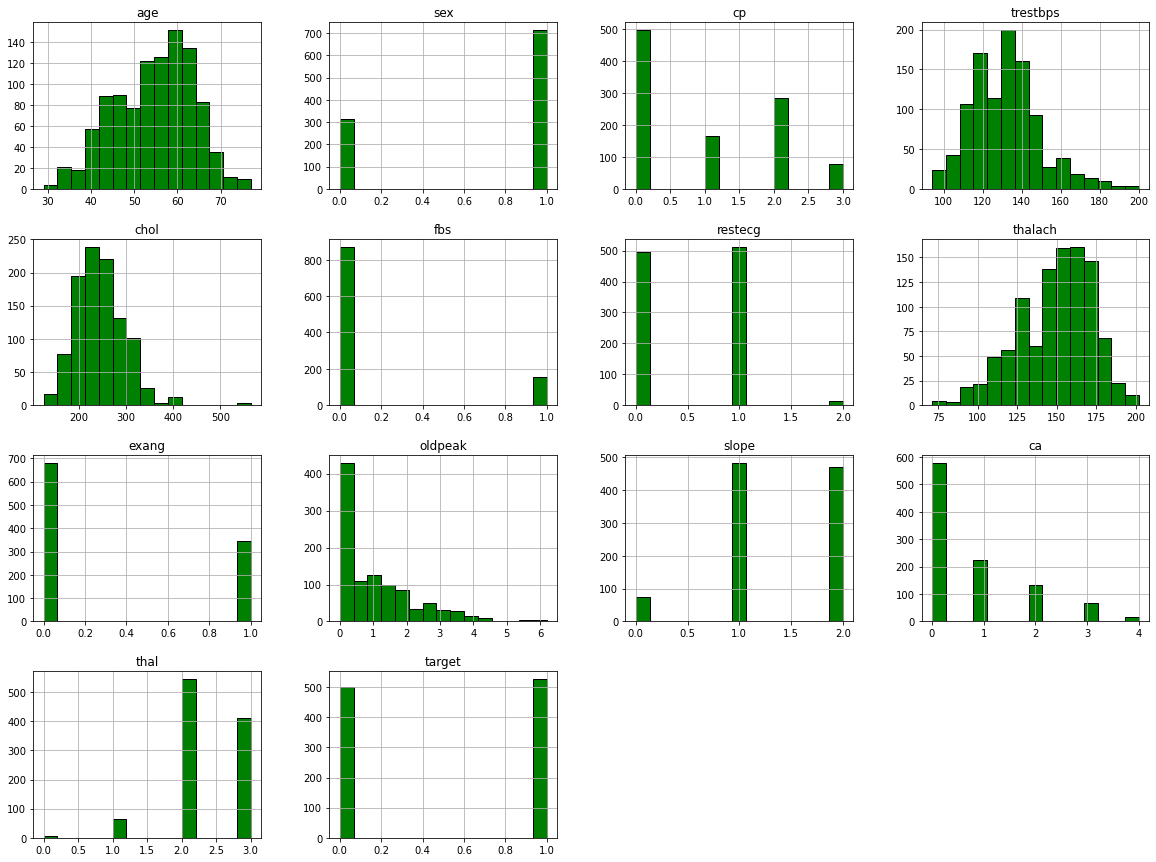

In [20]:
#To plot a histogram for each numerical attribute
heart.hist(bins=15, figsize=(20,15), color='g', edgecolor='k')
# plt.xlabel ('Topic title rate')
# plt.ylabel('Frequency')
plt.show()

# y-axis is the Frequency
# Bins is group count of values in a column

# Visualizing Data

<AxesSubplot:xlabel='age', ylabel='trestbps'>

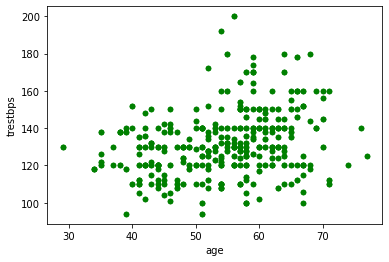

In [21]:
#Data Visualization
heart.plot(kind="scatter", x="age", y="trestbps", color='g')

<AxesSubplot:xlabel='age', ylabel='trestbps'>

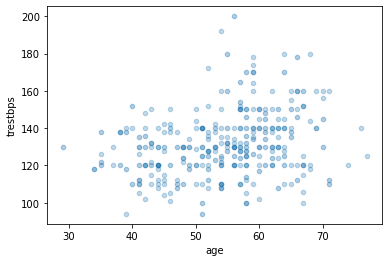

In [22]:
heart.plot(kind="scatter", x="age", y="trestbps", alpha=0.1)
# alpha dictates the gradient of the scatter plot ( 1,0.5 or 0.25.)

# Week 3

# Correlation


In [23]:
# Correlation of all the attributes with the expected class attribute (target)
corr_matrix = heart.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [24]:
corr_matrix["target"].sort_values(ascending=False)
# Listing the highest correlated attributes in acending arder

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

array([[<AxesSubplot:xlabel='target', ylabel='target'>,
        <AxesSubplot:xlabel='cp', ylabel='target'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='target'>,
        <AxesSubplot:xlabel='exang', ylabel='target'>,
        <AxesSubplot:xlabel='thalach', ylabel='target'>],
       [<AxesSubplot:xlabel='target', ylabel='cp'>,
        <AxesSubplot:xlabel='cp', ylabel='cp'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='cp'>,
        <AxesSubplot:xlabel='exang', ylabel='cp'>,
        <AxesSubplot:xlabel='thalach', ylabel='cp'>],
       [<AxesSubplot:xlabel='target', ylabel='oldpeak'>,
        <AxesSubplot:xlabel='cp', ylabel='oldpeak'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='oldpeak'>,
        <AxesSubplot:xlabel='exang', ylabel='oldpeak'>,
        <AxesSubplot:xlabel='thalach', ylabel='oldpeak'>],
       [<AxesSubplot:xlabel='target', ylabel='exang'>,
        <AxesSubplot:xlabel='cp', ylabel='exang'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='exang'>,
        <AxesSubplo

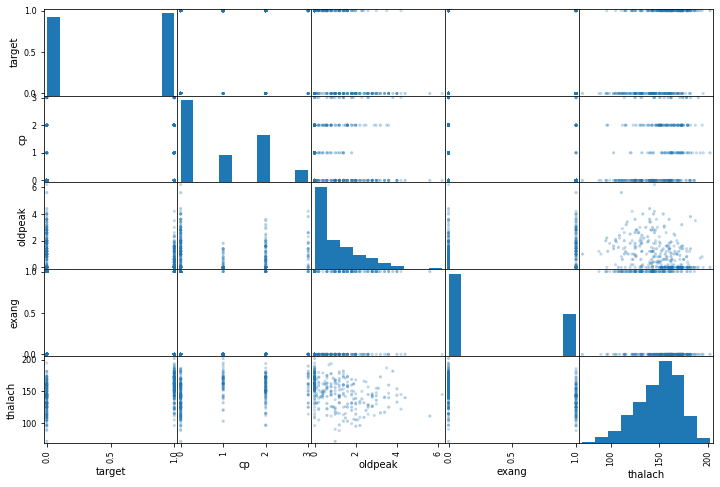

In [25]:
from pandas.plotting import scatter_matrix

attributes = ["target", "cp", "oldpeak",
              "exang","thalach"]
# Picked the top 2 and inversly top 2 attributes and visualizing against target
scatter_matrix(heart[attributes], figsize=(12, 8), alpha=0.1)

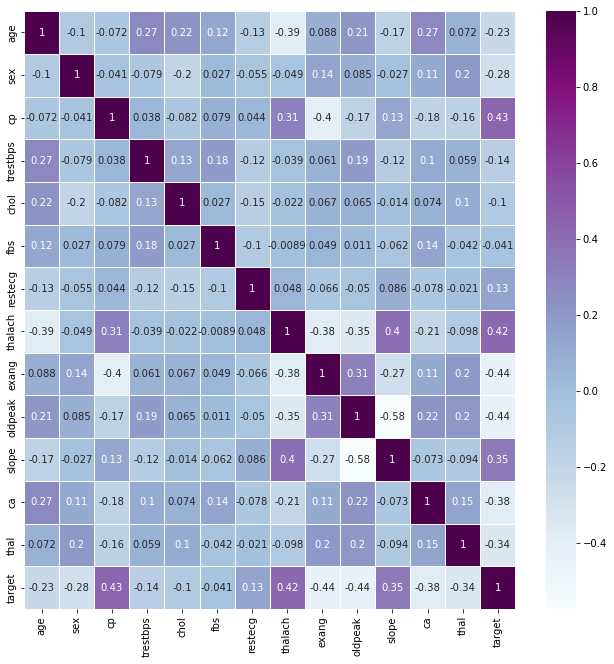

In [26]:
plt.figure(figsize=(11, 11))
corr_heatmap = sns.heatmap(heart.corr(),annot=True,cmap="BuPu", linewidths = 1.0)
# To plot the heat map of thr correlated values 

# Week 4

# Prediction with Logistic Regression

Trying with top 6 attributes

In [27]:
corr_attributes =  ['target','age', 'sex','oldpeak', 'slope', 'ca','cp', 'thalach', 'exang']
# Selecting only the important attributes with high correlation

In [28]:
new_heart = heart[corr_attributes]
# Making a new dataset with the corelated attributes

In [29]:
X = new_heart.drop(['target'], axis = 1)
y = new_heart[['target']]
# X refers to al our input parameters, y refers to the target class

In [30]:
X.head()

,age,sex,oldpeak,slope,ca,cp,thalach,exang
0,52,1,1.0,2,2,0,168,0
1,53,1,3.1,0,0,0,155,1
2,70,1,2.6,0,0,0,125,1
3,61,1,0.0,2,1,0,161,0
4,62,0,1.9,1,3,0,106,0


In [31]:
y.head(10)

,target
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 42)
# Splitting the dataset to 7:3 ratio for training and testing 
# Train_size parameter defines the size percent for training and testing
# Random_state parameter defines the rate of shuffle between the dataset to increase accuracy

In [33]:
X_train

,age,sex,oldpeak,slope,ca,cp,thalach,exang
1020,59,1,0.0,2,0,1,164,1
479,58,1,2.2,1,3,0,131,1
227,44,0,0.3,1,1,2,149,0
910,50,1,0.6,1,1,2,163,0
362,43,0,0.2,1,0,2,165,0
...,...,...,...,...,...,...,...,...
700,41,1,2.0,1,0,2,168,0
71,61,1,1.9,2,1,0,138,1
106,51,1,1.6,2,0,0,173,1
270,43,1,0.0,2,0,0,161,0


In [34]:
y_train = np.ravel(y_train)
y_train
# To print the values in an array

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [35]:
heart_classifier=LogisticRegression(max_iter=500)
heart_classifier.fit(X_train,y_train)
y_predict=heart_classifier.predict(X_test)

# Using Logistic Regression as a model with the iteration of 500

In [36]:
print(classification_report(y_test, y_predict))
print()
print('Accuracy', accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       159
           1       0.78      0.86      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.82      0.81       308
weighted avg       0.82      0.81      0.81       308


Accuracy 0.814935064935065


Trying with top 4 attributes attributes

In [37]:
corr_attributes =  [ 'target','age', 'sex','oldpeak', 'cp', 'thalach', 'exang']
# Selecting only the important attributes with high correlation

In [38]:
new_heart = heart[corr_attributes]
# Making a new dataset with the corelated attributes

In [39]:
X = new_heart.drop(['target'], axis = 1)
y = new_heart[['target']]
# X refers to al our input parameters, y refers to the target class

In [40]:
X.head()

,age,sex,oldpeak,cp,thalach,exang
0,52,1,1.0,0,168,0
1,53,1,3.1,0,155,1
2,70,1,2.6,0,125,1
3,61,1,0.0,0,161,0
4,62,0,1.9,0,106,0


In [41]:
y.head(10)

,target
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 42)

# Splitting the dataset to 7:3 ratio for training and testing 
# Train_size parameter defines the size percent for training and testing
# Random_state parameter defines the rate of shuffle between the dataset to increase accuracy

In [43]:
X_train

,age,sex,oldpeak,cp,thalach,exang
1020,59,1,0.0,1,164,1
479,58,1,2.2,0,131,1
227,44,0,0.3,2,149,0
910,50,1,0.6,2,163,0
362,43,0,0.2,2,165,0
...,...,...,...,...,...,...
700,41,1,2.0,2,168,0
71,61,1,1.9,0,138,1
106,51,1,1.6,0,173,1
270,43,1,0.0,0,161,0


In [44]:
y_train = np.ravel(y_train)
y_train
# To print the values in an array

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [45]:
heart_classifier=LogisticRegression(max_iter=500)
heart_classifier.fit(X_train,y_train)
y_predict=heart_classifier.predict(X_test)

# Using Logistic Regression as a model with the iteration of 500

In [46]:
print(classification_report(y_test, y_predict))
print()
print('Accuracy', accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       159
           1       0.77      0.85      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.81       308
weighted avg       0.81      0.81      0.81       308


Accuracy 0.8084415584415584


Trying with top 2 attributes

In [47]:
corr_attributes =  [ 'target','age', 'sex','oldpeak', 'cp',]
# Selecting only the important attributes with high correlation

In [48]:
new_heart = heart[corr_attributes]
# Making a new dataset with the corelated attributes

In [49]:
X = new_heart.drop(['target'], axis = 1)
y = new_heart[['target']]
# X refers to al our input parameters, y refers to the target class

In [50]:
X.head()

,age,sex,oldpeak,cp
0,52,1,1.0,0
1,53,1,3.1,0
2,70,1,2.6,0
3,61,1,0.0,0
4,62,0,1.9,0


In [51]:
y.head(10)

,target
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 42)
# Splitting the dataset to 7:3 ratio for training and testing 
# Train_size parameter defines the size percent for training and testing
# Random_state parameter defines the rate of shuffle between the dataset to increase accuracy

In [53]:
X_train

,age,sex,oldpeak,cp
1020,59,1,0.0,1
479,58,1,2.2,0
227,44,0,0.3,2
910,50,1,0.6,2
362,43,0,0.2,2
...,...,...,...,...
700,41,1,2.0,2
71,61,1,1.9,0
106,51,1,1.6,0
270,43,1,0.0,0


In [54]:
y_train = np.ravel(y_train)
y_train
# To print the values in an array

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [55]:
heart_classifier=LogisticRegression(max_iter=500)
heart_classifier.fit(X_train,y_train)
y_predict=heart_classifier.predict(X_test)

# Using Logistic Regression as a model with the iteration of 500

In [56]:
print(classification_report(y_test, y_predict))
print()
print('Accuracy', accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       159
           1       0.74      0.81      0.77       149

    accuracy                           0.77       308
   macro avg       0.77      0.77      0.77       308
weighted avg       0.77      0.77      0.77       308


Accuracy 0.7694805194805194


Trying with top 8 attributes

In [57]:
corr_attributes =  ['target','age', 'sex','oldpeak', 'slope', 'ca','cp', 'thalach', 'exang', 'restecg', 'thal']
# Selecting only the important attributes with high correlation

In [58]:
new_heart = heart[corr_attributes]
# Making a new dataset with the corelated attributes

In [59]:
X = new_heart.drop(['target'], axis = 1)
y = new_heart[['target']]
# X refers to al our input parameters, y refers to the target class

In [60]:
X.head()

,age,sex,oldpeak,slope,ca,cp,thalach,exang,restecg,thal
0,52,1,1.0,2,2,0,168,0,1,3
1,53,1,3.1,0,0,0,155,1,0,3
2,70,1,2.6,0,0,0,125,1,1,3
3,61,1,0.0,2,1,0,161,0,1,3
4,62,0,1.9,1,3,0,106,0,1,2


In [61]:
y.head(10)

,target
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 42)
# Splitting the dataset to 7:3 ratio for training and testing 
# Train_size parameter defines the size percent for training and testing
# Random_state parameter defines the rate of shuffle between the dataset to increase accuracy

In [63]:
X_train

,age,sex,oldpeak,slope,ca,cp,thalach,exang,restecg,thal
1020,59,1,0.0,2,0,1,164,1,1,2
479,58,1,2.2,1,3,0,131,1,0,3
227,44,0,0.3,1,1,2,149,0,1,2
910,50,1,0.6,1,1,2,163,0,1,3
362,43,0,0.2,1,0,2,165,0,1,2
...,...,...,...,...,...,...,...,...,...,...
700,41,1,2.0,1,0,2,168,0,0,2
71,61,1,1.9,2,1,0,138,1,0,3
106,51,1,1.6,2,0,0,173,1,1,3
270,43,1,0.0,2,0,0,161,0,1,3


In [64]:
y_train = np.ravel(y_train)
y_train
# To print the values in an array

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [65]:
heart_classifier=LogisticRegression(max_iter=500)
heart_classifier.fit(X_train,y_train)
y_predict=heart_classifier.predict(X_test)

# Using Logistic Regression as a model with the iteration of 500

In [66]:
print(classification_report(y_test, y_predict))
print()
print('Accuracy', accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       159
           1       0.79      0.91      0.85       149

    accuracy                           0.84       308
   macro avg       0.85      0.84      0.84       308
weighted avg       0.85      0.84      0.84       308


Accuracy 0.8409090909090909


You can see by taking 8 attributes the accuracy percentage has increased to 0.83%

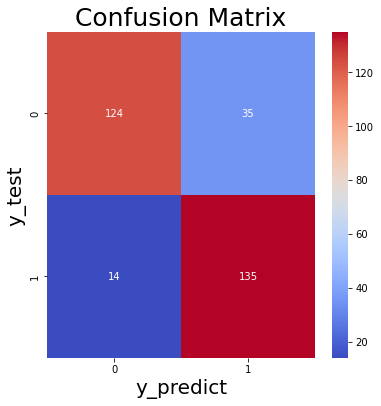

In [67]:
# Plotting the confussion matrix between y_prect and y_test
conf_matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap='coolwarm')  # Fmt represents the type of text (d = decimal)
plt.ylabel("y_test", fontsize=20)
plt.xlabel("y_predict", fontsize=20)
plt.title("Confusion Matrix", fontsize=25)
plt.show()

In [68]:
true_pos, false_pos, Thresh =roc_curve(y_test, y_predict)

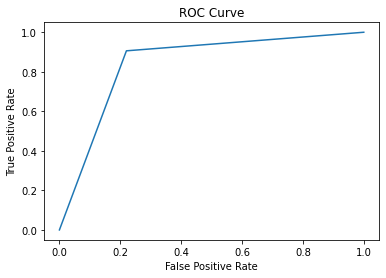

area under ROC curve is 0.8429572411464269


In [69]:
plt.plot(true_pos, false_pos)
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('area under ROC curve is', roc_auc_score(y_test, y_predict))
# Map to display the relationship between TP rate and FP rate
# The higher the Tp rate the better

# Week 5

# Prediction with Multinominal Naive Bayes

In [70]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import MultinomialNB

In [71]:
mnb = MultinomialNB()
y_predict = mnb.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_predict))
print()
print('Accuracy', accuracy_score(y_test, y_predict))



              precision    recall  f1-score   support

           0       0.79      0.73      0.76       159
           1       0.73      0.79      0.76       149

    accuracy                           0.76       308
   macro avg       0.76      0.76      0.76       308
weighted avg       0.76      0.76      0.76       308


Accuracy 0.7597402597402597


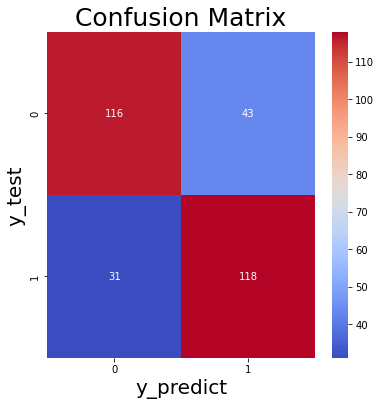

In [72]:
conf_matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap='coolwarm')
plt.ylabel("y_test", fontsize=20)
plt.xlabel("y_predict", fontsize=20)
plt.title("Confusion Matrix", fontsize=25)
plt.show()

In [73]:
true_pos, false_pos, Thresh =roc_curve(y_test, y_predict)

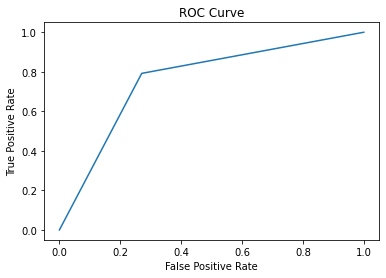

area under ROC curve is 0.7607530285762527


In [74]:
plt.plot(true_pos, false_pos)
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('area under ROC curve is', roc_auc_score(y_test, y_predict))

# Prediction with Gaussian Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
gnb = GaussianNB()
y_predict = gnb.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_predict))
print()
print('Accuracy', accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       159
           1       0.77      0.85      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.81       308
weighted avg       0.81      0.81      0.80       308


Accuracy 0.8051948051948052


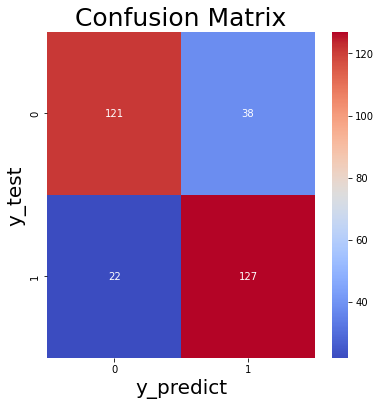

In [77]:
conf_matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap='coolwarm')
plt.ylabel("y_test", fontsize=20)
plt.xlabel("y_predict", fontsize=20)
plt.title("Confusion Matrix", fontsize=25)
plt.show()

In [78]:
true_pos, false_pos, Thresh =roc_curve(y_test, y_predict)

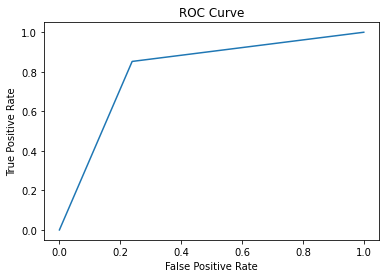

area under ROC curve is 0.8066776412983834


In [79]:
plt.plot(true_pos, false_pos)
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('area under ROC curve is', roc_auc_score(y_test, y_predict))

# Prediction with Complement Naive Bayes

In [80]:
from sklearn.naive_bayes import ComplementNB

In [81]:
cnb = ComplementNB()
y_predict = cnb.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_predict))
print()
print('Accuracy', accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       159
           1       0.73      0.79      0.76       149

    accuracy                           0.76       308
   macro avg       0.76      0.76      0.76       308
weighted avg       0.76      0.76      0.76       308


Accuracy 0.7597402597402597


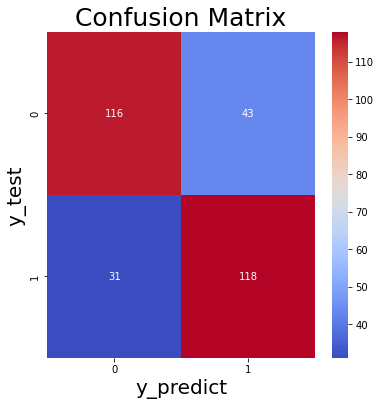

In [82]:
conf_matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap='coolwarm')
plt.ylabel("y_test", fontsize=20)
plt.xlabel("y_predict", fontsize=20)
plt.title("Confusion Matrix", fontsize=25)
plt.show()

In [83]:
true_pos, false_pos, Thresh =roc_curve(y_test, y_predict)

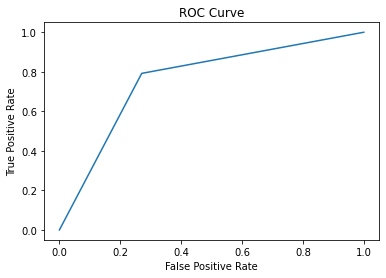

area under ROC curve is 0.7607530285762527


In [84]:
plt.plot(true_pos, false_pos)
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('area under ROC curve is', roc_auc_score(y_test, y_predict))

# Prediction with Bernouli Naive Bayes

In [85]:
from sklearn.naive_bayes import BernoulliNB

In [86]:
bnb = BernoulliNB()
y_predict = bnb.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_predict))
print()
print('Accuracy', accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       159
           1       0.80      0.86      0.83       149

    accuracy                           0.82       308
   macro avg       0.83      0.83      0.82       308
weighted avg       0.83      0.82      0.82       308


Accuracy 0.8246753246753247


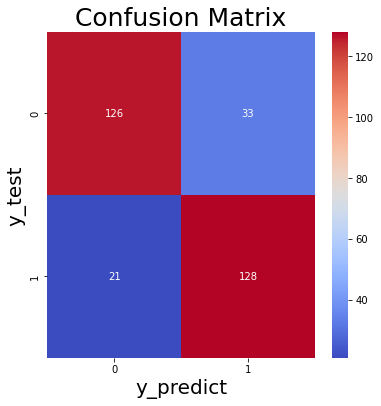

In [87]:
conf_matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap='coolwarm')
plt.ylabel("y_test", fontsize=20)
plt.xlabel("y_predict", fontsize=20)
plt.title("Confusion Matrix", fontsize=25)
plt.show()

In [88]:
true_pos, false_pos, Thresh =roc_curve(y_test, y_predict)

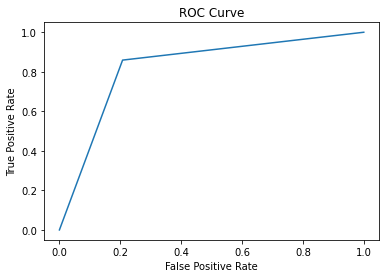

area under ROC curve is 0.8257566164366216


In [89]:
plt.plot(true_pos, false_pos)
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('area under ROC curve is', roc_auc_score(y_test, y_predict))

# Prediction with Categorical Naive Bayes

In [90]:
from sklearn.naive_bayes import CategoricalNB

In [91]:
ctnb =CategoricalNB()
y_predict = ctnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))
print()
print('Accuracy', accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       159
           1       0.81      0.87      0.84       149

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308


Accuracy 0.8409090909090909


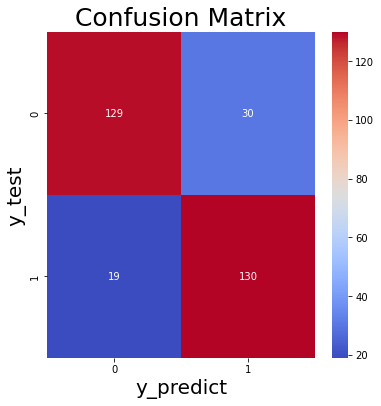

In [92]:
conf_matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap='coolwarm')
plt.ylabel("y_test", fontsize=20)
plt.xlabel("y_predict", fontsize=20)
plt.title("Confusion Matrix", fontsize=25)
plt.show()

In [93]:
true_pos, false_pos, Thresh =roc_curve(y_test, y_predict)

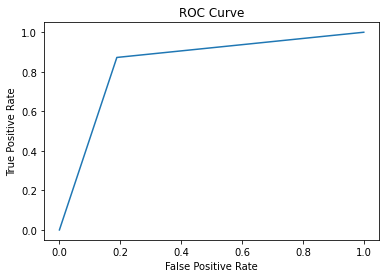

area under ROC curve is 0.8419019880967457


In [94]:
plt.plot(true_pos, false_pos)
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('area under ROC curve is', roc_auc_score(y_test, y_predict))

<!-- ctnb = CategoricalNB(alpha = 0)
y_predict = ctnb.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_predict))
print()
print('Accuracy', accuracy_score(y_test, y_predict))
 -->

# Comparison between different <i>Naive Bayes Algorithms</i>

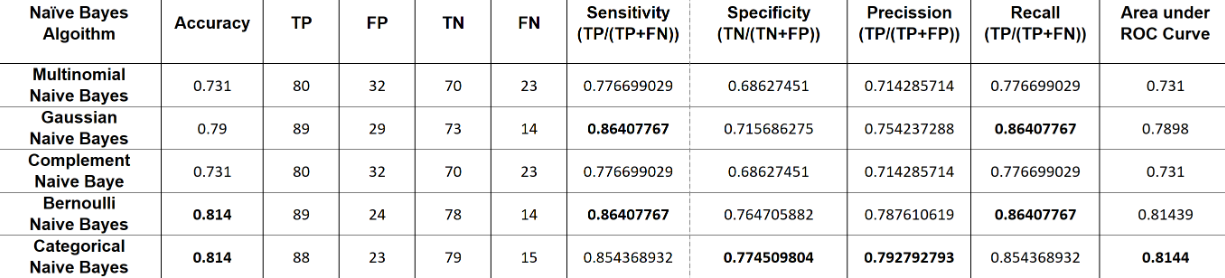

# Week 7

# <i> K- Means </i> Clustering 

In [95]:
from sklearn.cluster import KMeans

In [96]:
k = 5 # number of clusters (default)
kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
y_predict = kmeans.fit_predict(new_heart[['target','cp']])

In [97]:
# Accuracy of clusters
kmeans.score(new_heart[['target','cp']])

-86.41713715426287

In [98]:
y_predict

array([2, 2, 2, ..., 2, 3, 2])

In [99]:
y_predict is kmeans.labels_

True

In [100]:
# Predicts the closest cluster each sample in X belongs to.
kmeans.cluster_centers_

array([[ 8.02395210e-01,  1.00000000e+00],
       [ 1.00000000e+00,  2.18888889e+00],
       [-3.33066907e-16,  5.55111512e-16],
       [ 1.00000000e+00,  4.44089210e-16],
       [-3.33066907e-16,  2.28571429e+00]])

In [101]:
kmeans.labels_

array([2, 2, 2, ..., 2, 3, 2])

# <i>Gaussian Mixture Model</i>

In [102]:
# checks whether a cluster contains only samples belonging to a single class
from sklearn.metrics import homogeneity_score
from sklearn.mixture import GaussianMixture as EM

In [103]:
em = EM(n_components = 2, max_iter = 50, n_init = 1).fit(X_train)
y_predict = em.predict(X_train)
print(homogeneity_score(y_train, y_predict))

0.17553608756374417


# Elbow Method

This method helps to decide on an optimal value for <i>k</i> i.e., the number of clusters

In [104]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [105]:
# It is calculated by measuring the distance between each data point 
# And its centroid, squaring this distance, and summing these squares across one cluster.
inertias

[432495.8380195258,
 180240.50629167614,
 112985.39662381832,
 87351.09350907919,
 70988.68928244273,
 58812.226336947024,
 51127.59659882234,
 45927.70665671893,
 41125.59491610607]

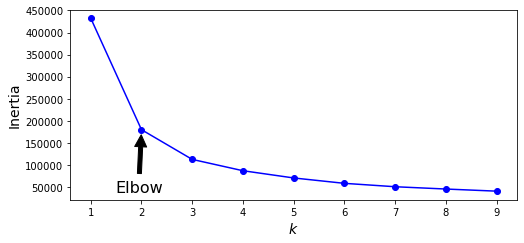

In [106]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.2, 0.2),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

plt.show()

From the above graph k is best taken as 2

In [107]:
# Updated k value
k = 2 # number of clusters (default)
kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
y_predict = kmeans.fit_predict(new_heart[['target','cp']])

In [108]:
kmeans.score(new_heart[['target','cp']])

-403.56933485801386

In [109]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [110]:
y_predict is kmeans.labels_

True

In [111]:
kmeans.cluster_centers_

array([[0.23018868, 0.06226415],
       [0.81616162, 1.88484848]])

In [112]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

# Week 8

# Decision Tree

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os

In [114]:
# Display the first five rows of the dataset
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [115]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import randint
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [116]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3, criterion="gini")
decision_tree.fit(X_train, y_train)
y_predict = decision_tree.predict(X_test)
X_predict = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test, y_predict))
print("Training Accuracy: ",accuracy_score(y_train,X_predict))

Testing Accuracy:  0.8051948051948052
Training Accuracy:  0.8577405857740585


[Text(0.5, 0.875, 'X[5] <= 0.5\ngini = 0.499\nsamples = 717\nvalue = [340, 377]'),
 Text(0.25, 0.625, 'X[4] <= 0.5\ngini = 0.38\nsamples = 345\nvalue = [257, 88]'),
 Text(0.125, 0.375, 'X[9] <= 2.5\ngini = 0.499\nsamples = 152\nvalue = [72, 80]'),
 Text(0.0625, 0.125, 'gini = 0.339\nsamples = 88\nvalue = [19, 69]'),
 Text(0.1875, 0.125, 'gini = 0.285\nsamples = 64\nvalue = [53, 11]'),
 Text(0.375, 0.375, 'X[8] <= 0.5\ngini = 0.079\nsamples = 193\nvalue = [185, 8]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 120\nvalue = [120, 0]'),
 Text(0.4375, 0.125, 'gini = 0.195\nsamples = 73\nvalue = [65, 8]'),
 Text(0.75, 0.625, 'X[9] <= 2.5\ngini = 0.347\nsamples = 372\nvalue = [83, 289]'),
 Text(0.625, 0.375, 'X[2] <= 2.1\ngini = 0.225\nsamples = 278\nvalue = [36, 242]'),
 Text(0.5625, 0.125, 'gini = 0.174\nsamples = 260\nvalue = [25, 235]'),
 Text(0.6875, 0.125, 'gini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.875, 0.375, 'X[6] <= 142.5\ngini = 0.5\nsamples = 94\nvalue = [47, 47]'),
 

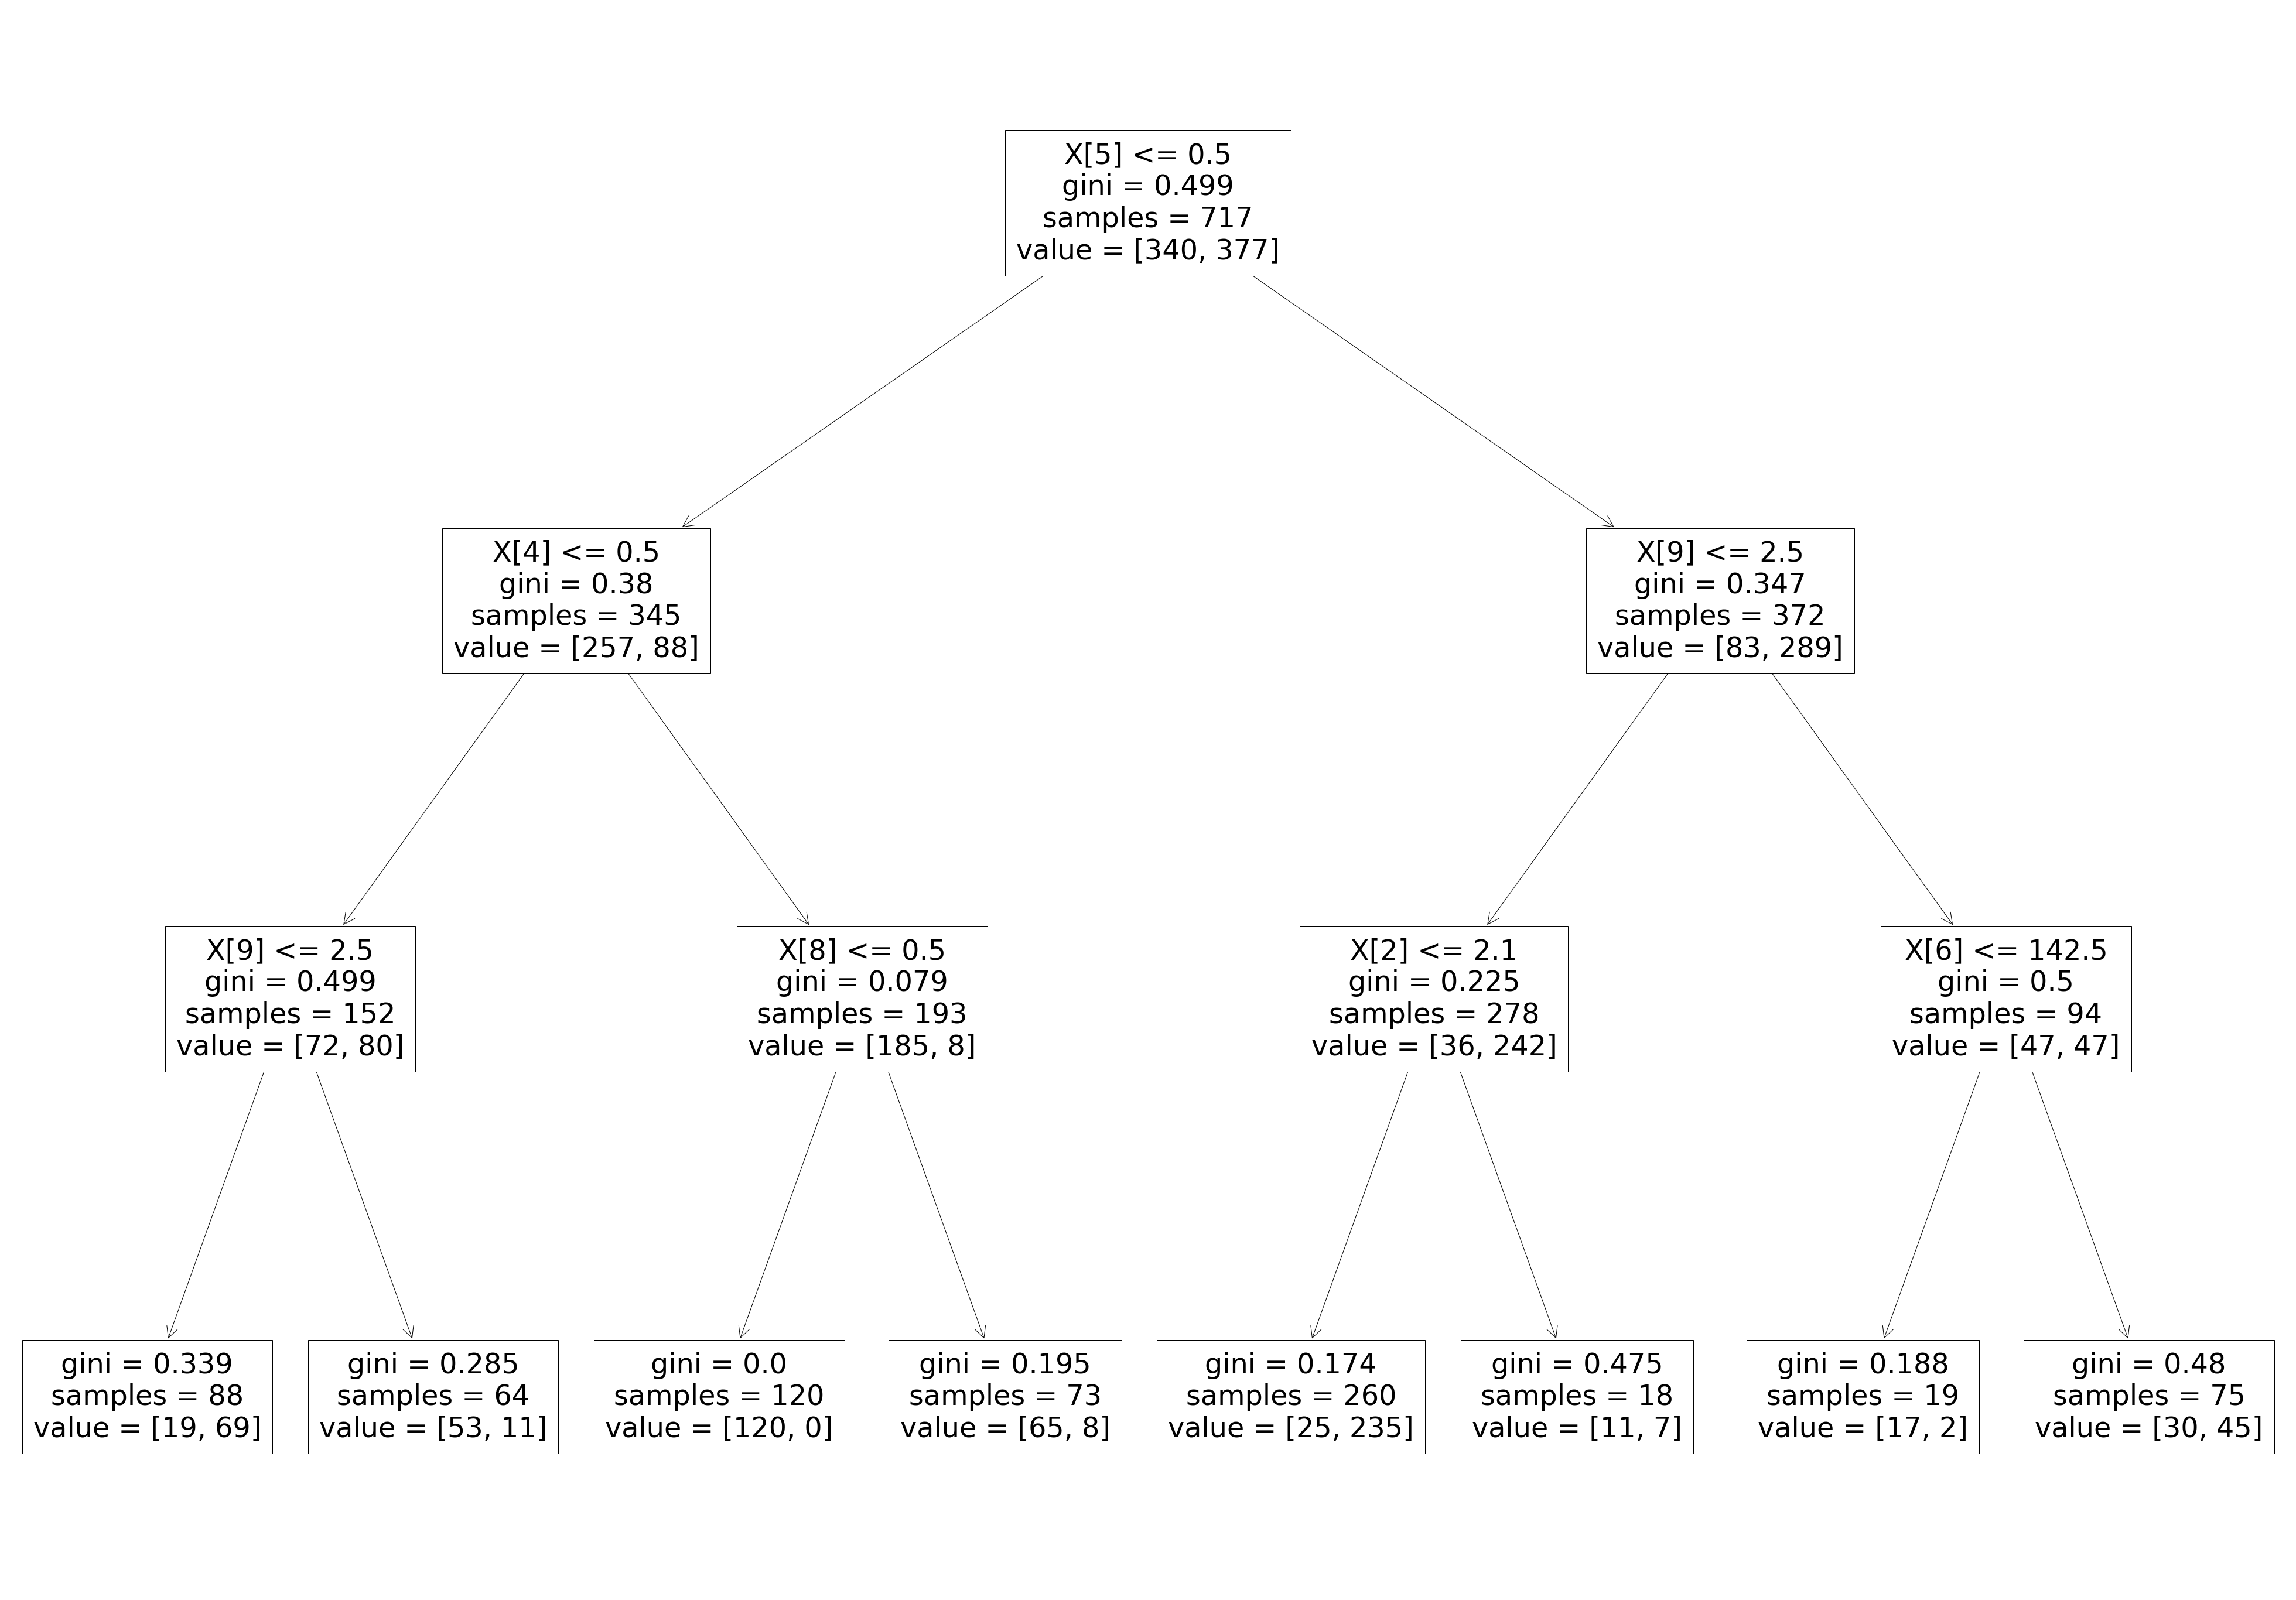

In [117]:
plt.figure(figsize=(70,50))
plot_tree(decision_tree)

# 10-Fold Cross Validation

In [118]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision_tree, X_train, y_train, cv=10)
scores

array([0.90277778, 0.80555556, 0.86111111, 0.84722222, 0.84722222,
       0.84722222, 0.83333333, 0.85915493, 0.84507042, 0.73239437])

In [119]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.84 accuracy with a standard deviation of 0.04


In [120]:
# Precision measure
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_predict)

0.7542857142857143

In [121]:
# Recall score
recall_score(y_test, y_predict)

0.8859060402684564

In [122]:
# F measure
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8148148148148148

In [123]:
# ROC area
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_predict)
roc_auc

0.8077328943480647

# Changing Parameter

In [124]:
decision_tree = DecisionTreeClassifier(max_depth=4, splitter="best", min_samples_leaf=2)
decision_tree.fit(X_train, y_train)
y_predict = decision_tree.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test,y_predict))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.827922077922078
Training Accuracy:  0.891213389121339


In [125]:
decision_tree = DecisionTreeClassifier(max_depth=4, splitter="best", min_samples_leaf=6)
decision_tree.fit(X_train, y_train)
y_predict = decision_tree.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test, y_predict))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.814935064935065
Training Accuracy:  0.8814504881450488


In [126]:
decision_tree = DecisionTreeClassifier(max_depth=2, splitter="best", min_samples_leaf=8)
decision_tree.fit(X_train, y_train)
y_predict = decision_tree.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test, y_predict))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.7012987012987013
Training Accuracy:  0.7726638772663877


In [127]:
decision_tree = DecisionTreeClassifier(max_depth=10, splitter="best", min_samples_leaf=8)
decision_tree.fit(X_train, y_train)
y_predict = decision_tree.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test, y_predict))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.8798701298701299
Training Accuracy:  0.9149232914923291


In [128]:
decision_tree = DecisionTreeClassifier(max_depth=10, splitter="random", min_samples_leaf=8)
decision_tree.fit(X_train, y_train)
y_predict = decision_tree.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test, y_predict))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.8116883116883117
Training Accuracy:  0.8884239888423989


In [129]:
decision_tree = DecisionTreeClassifier(max_depth=10, splitter="best", min_samples_leaf=15)
decision_tree.fit(X_train, y_train)
y_predict= decision_tree.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test, y_predict))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.8409090909090909
Training Accuracy:  0.8772663877266388


In [130]:
decision_tree = DecisionTreeClassifier(max_depth=15, splitter="best", min_samples_leaf=4)
decision_tree.fit(X_train, y_train)
y_predict = decision_tree.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test,y_predict))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.9253246753246753
Training Accuracy:  0.9609483960948396


# Visual Conclusion

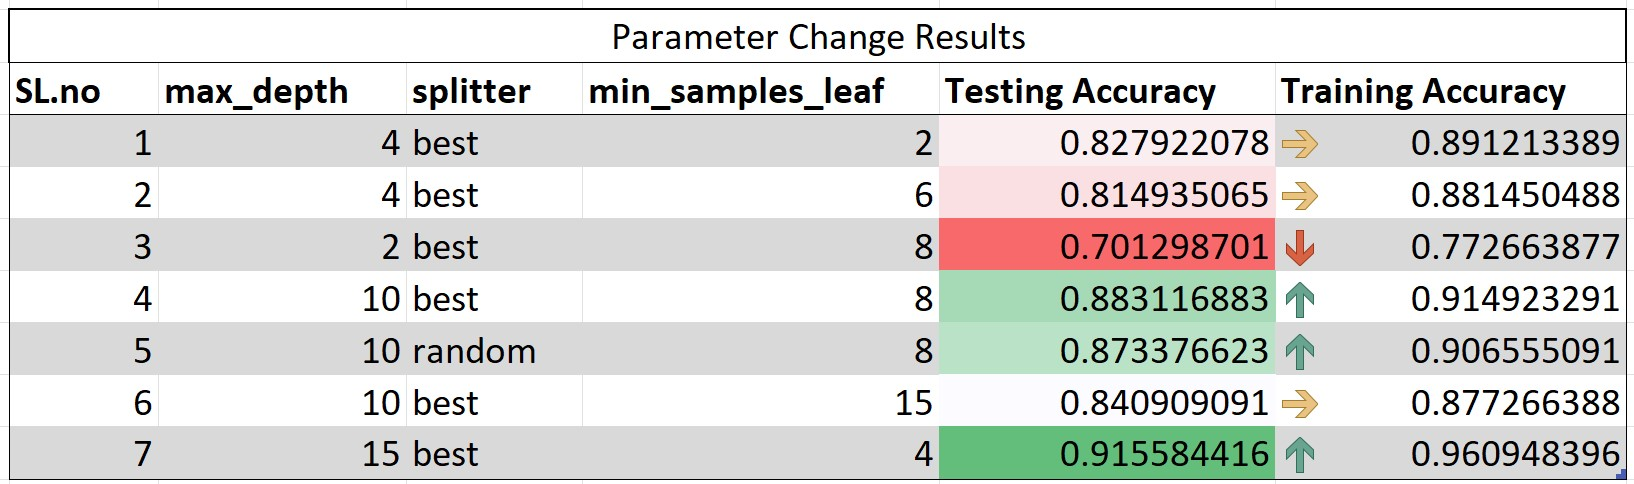

# Tree


In [131]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, train_size = 0.7, random_state = 42)

In [132]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=15, splitter="best", min_samples_leaf=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.9253246753246753


# Week 9


# Linear and Logistic Regression

In [133]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(0.6832168853129071,
 array([-0.00237171, -0.18170822, -0.07828555,  0.08272983, -0.09524734,
         0.11263238,  0.00262125, -0.12564327,  0.03930164, -0.14742662]))

In [134]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

linear_clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=20000))
linear_clf.fit(X_train, y_train)

pred = linear_clf.predict(X_test)
predx = linear_clf.predict(X_train)

print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.801948051948052
Training Accuracy:  0.8368200836820083


In [135]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_clf, X_train, y_train, cv=10)
scores

array([0.83333333, 0.76388889, 0.73611111, 0.80555556, 0.81944444,
       0.83333333, 0.86111111, 0.76056338, 0.73239437, 0.69014085])

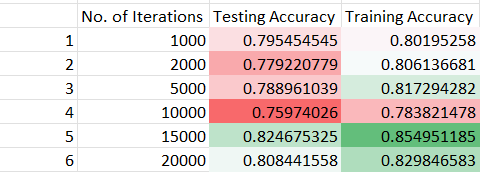

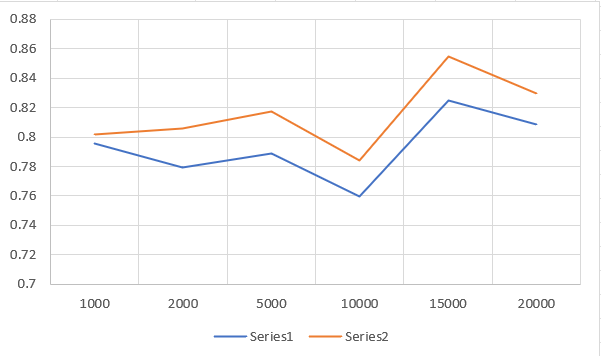

 # Week 10

# Classification  using MLP and perceptron

In [136]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [137]:
y_predict = MLPClassifier(random_state=1,hidden_layer_sizes=(20,),solver='adam',activation ='logistic',learning_rate_init=0.001, max_iter=5000).fit(X_train, y_train).predict(X_test)

In [138]:
print(classification_report(y_test, y_predict))
print()
print('Accuracy', accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       159
           1       0.88      0.89      0.88       149

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308


Accuracy 0.8863636363636364


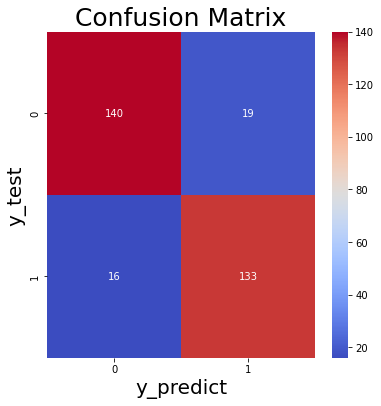

In [139]:
conf_matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap='coolwarm')
plt.ylabel("y_test", fontsize=20)
plt.xlabel("y_predict", fontsize=20)
plt.title("Confusion Matrix", fontsize=25)
plt.show()

In [140]:
true_pos, false_pos, Thresh =roc_curve(y_test, y_predict)

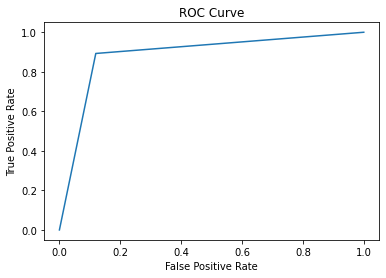

area under ROC curve is 0.8865602971592589


In [141]:
plt.plot(true_pos, false_pos)
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('area under ROC curve is', roc_auc_score(y_test, y_predict))

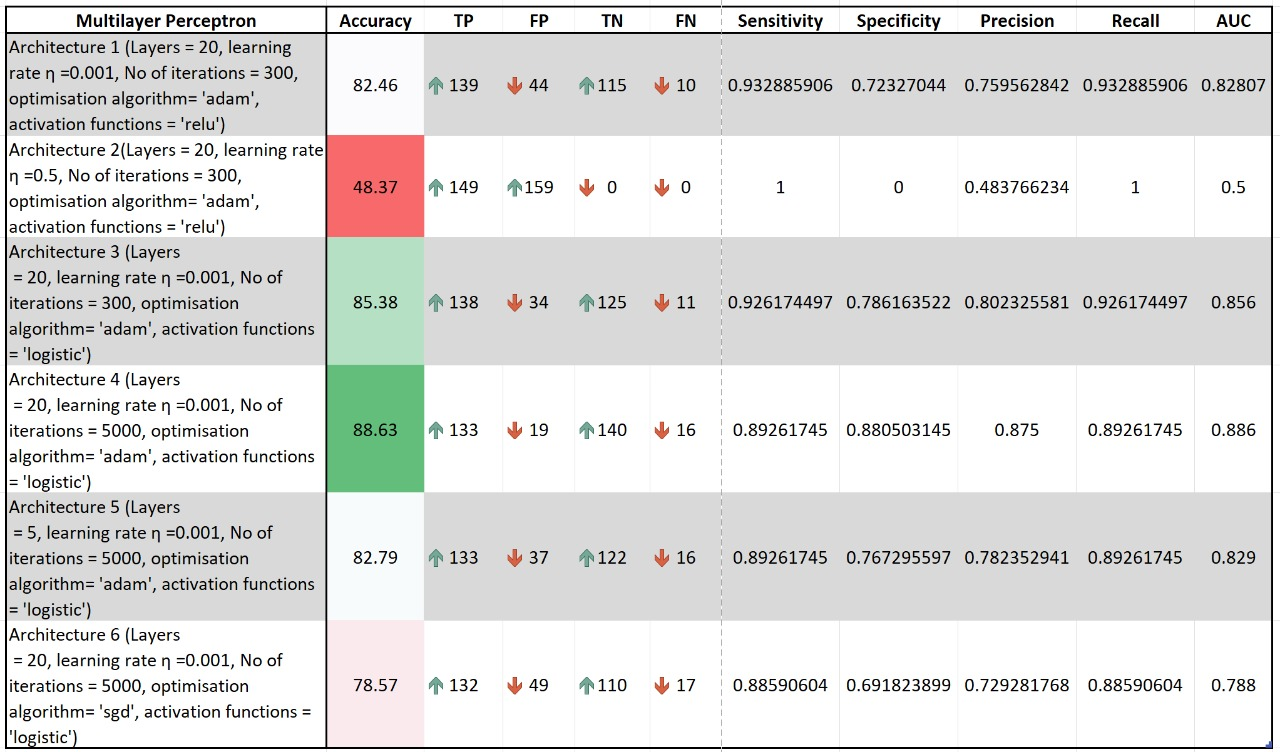